### **TEAM MEMBERS:**

*   A ADITYA -CB.EN.U4CSE19002
*   K NIKUNJ -CB.EN.U4CSE19030
*   P HARINADH-CB.EN.U4CSE19044


### **ABSTRACT:** 

The coronavirus (COVID-19) that was first reported at the end of 2019 has impacted every aspect of life as we know it. This case study focuses on incorporating field of data science with rising cases of covid or any such pandemics. Using few data pre-processing and cleaning techniques, we modelled the system to predict daily and cumulative incidence of COVID-19 cases throughout the world, death to infected ratio and such useful data which helps us in tackling the challenge we are up against. The coronavirus (COVID-19) has affected 181 countries with approximately 1,87,93,542 confirmed cases. Our model helps in understanding the transmission dynamics of the infection in each country which got affected on a daily basis and evaluating the effectiveness of control policies are critical for our further actions. To date, the statistics of COVID19 reported cases show that more than 80% of infected are mild cases of disease, around 14% of infected have severe complications, and about 5% are categorized as critical disease victims. The data obtained from this model can be used implement effective policies that yielded significant changes in the trend of cases like lockdown policy, shutdown of all nonessential companies.  

### **MOTIVATION AND OBJECTIVE:** 

We apply our method to predicting the number of new COVID-19 cases in India and for a subset of counties within the state to demonstrate the utility of this method at varying scales of prediction. Our method produces reasonably accurate results when the effective reproduction number is distributed similarly in the future as in the past. Large deviations from the predicted results can imply that a change in policy or some other factors have occurred that have dramatically altered the disease transmission over time. 

### **Data Selection**

In [ ]:
# Importing pandas library with alias pd
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading csv file to dataframe using .read_csv
# Link to dataset: https://raw.githubusercontent.com/Adiraju-Aditya/COVID_19_DATA_ANALYSIS/main/covid.csv
covid19 = pd.read_csv('https://raw.githubusercontent.com/Adiraju-Aditya/COVID_19_DATA_ANALYSIS/main/covid.csv')

In [ ]:
# Exploring first five rows of dataframe
covid19.head(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.56,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


### **Exploring Dataset**

In [ ]:
# Shape of dataset
covid19.shape

(19496, 32)

Observation: Rows - 19496 , Columns - 32

In [ ]:
# Columns in covid19 dataset
covid19.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [ ]:
# Finding different locations of dataset
covid19["location"].value_counts()

Japan             146
Netherlands       146
Sweden            146
Estonia           146
Nepal             146
                 ... 
Yemen              45
Western Sahara     29
Tajikistan         24
Comoros            23
Lesotho            10
Name: location, Length: 212, dtype: int64

Observation: There are 212 different locations in dataset

### **Data Preprocessing**

In [ ]:
# Checking if there are any columns with null values
covid19.isna().any()

iso_code                            True
location                           False
date                               False
total_cases                        False
new_cases                          False
total_deaths                       False
new_deaths                         False
total_cases_per_million             True
new_cases_per_million               True
total_deaths_per_million            True
new_deaths_per_million              True
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_units                         True
stringency_index                    True
population                          True
population_density                  True
median_age                          True
aged_65_older                       True
aged_70_older                       True
gdp_per_capita  

Observation: There are 26 columns with null values

In [ ]:
# Finding the sum of null values in each column
covid19.isna().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14332
new_tests                          14904
total_tests_per_thousand           14332
new_tests_per_thousand             14904
new_tests_smoothed                 13866
new_tests_smoothed_per_thousand    13866
tests_units                        13267
stringency_index                    4500
population                            64
population_density                   850
median_age                          1743
aged_65_older                       1980
aged_70_older                       1832
gdp_per_capita  

In [ ]:
# Replacing NaN values in every column with 0
import numpy as np
covid19.replace(np.nan, 0, inplace = True)

### **Data Visualization**

In [ ]:
# Exploring data location == India
india = covid19[covid19["location"] == "India"] 
india.head(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [ ]:
# Importing seaborn library alias sns
# Importing pyplot library from Matplotlib as plt
import seaborn as sns
from matplotlib import pyplot as plt

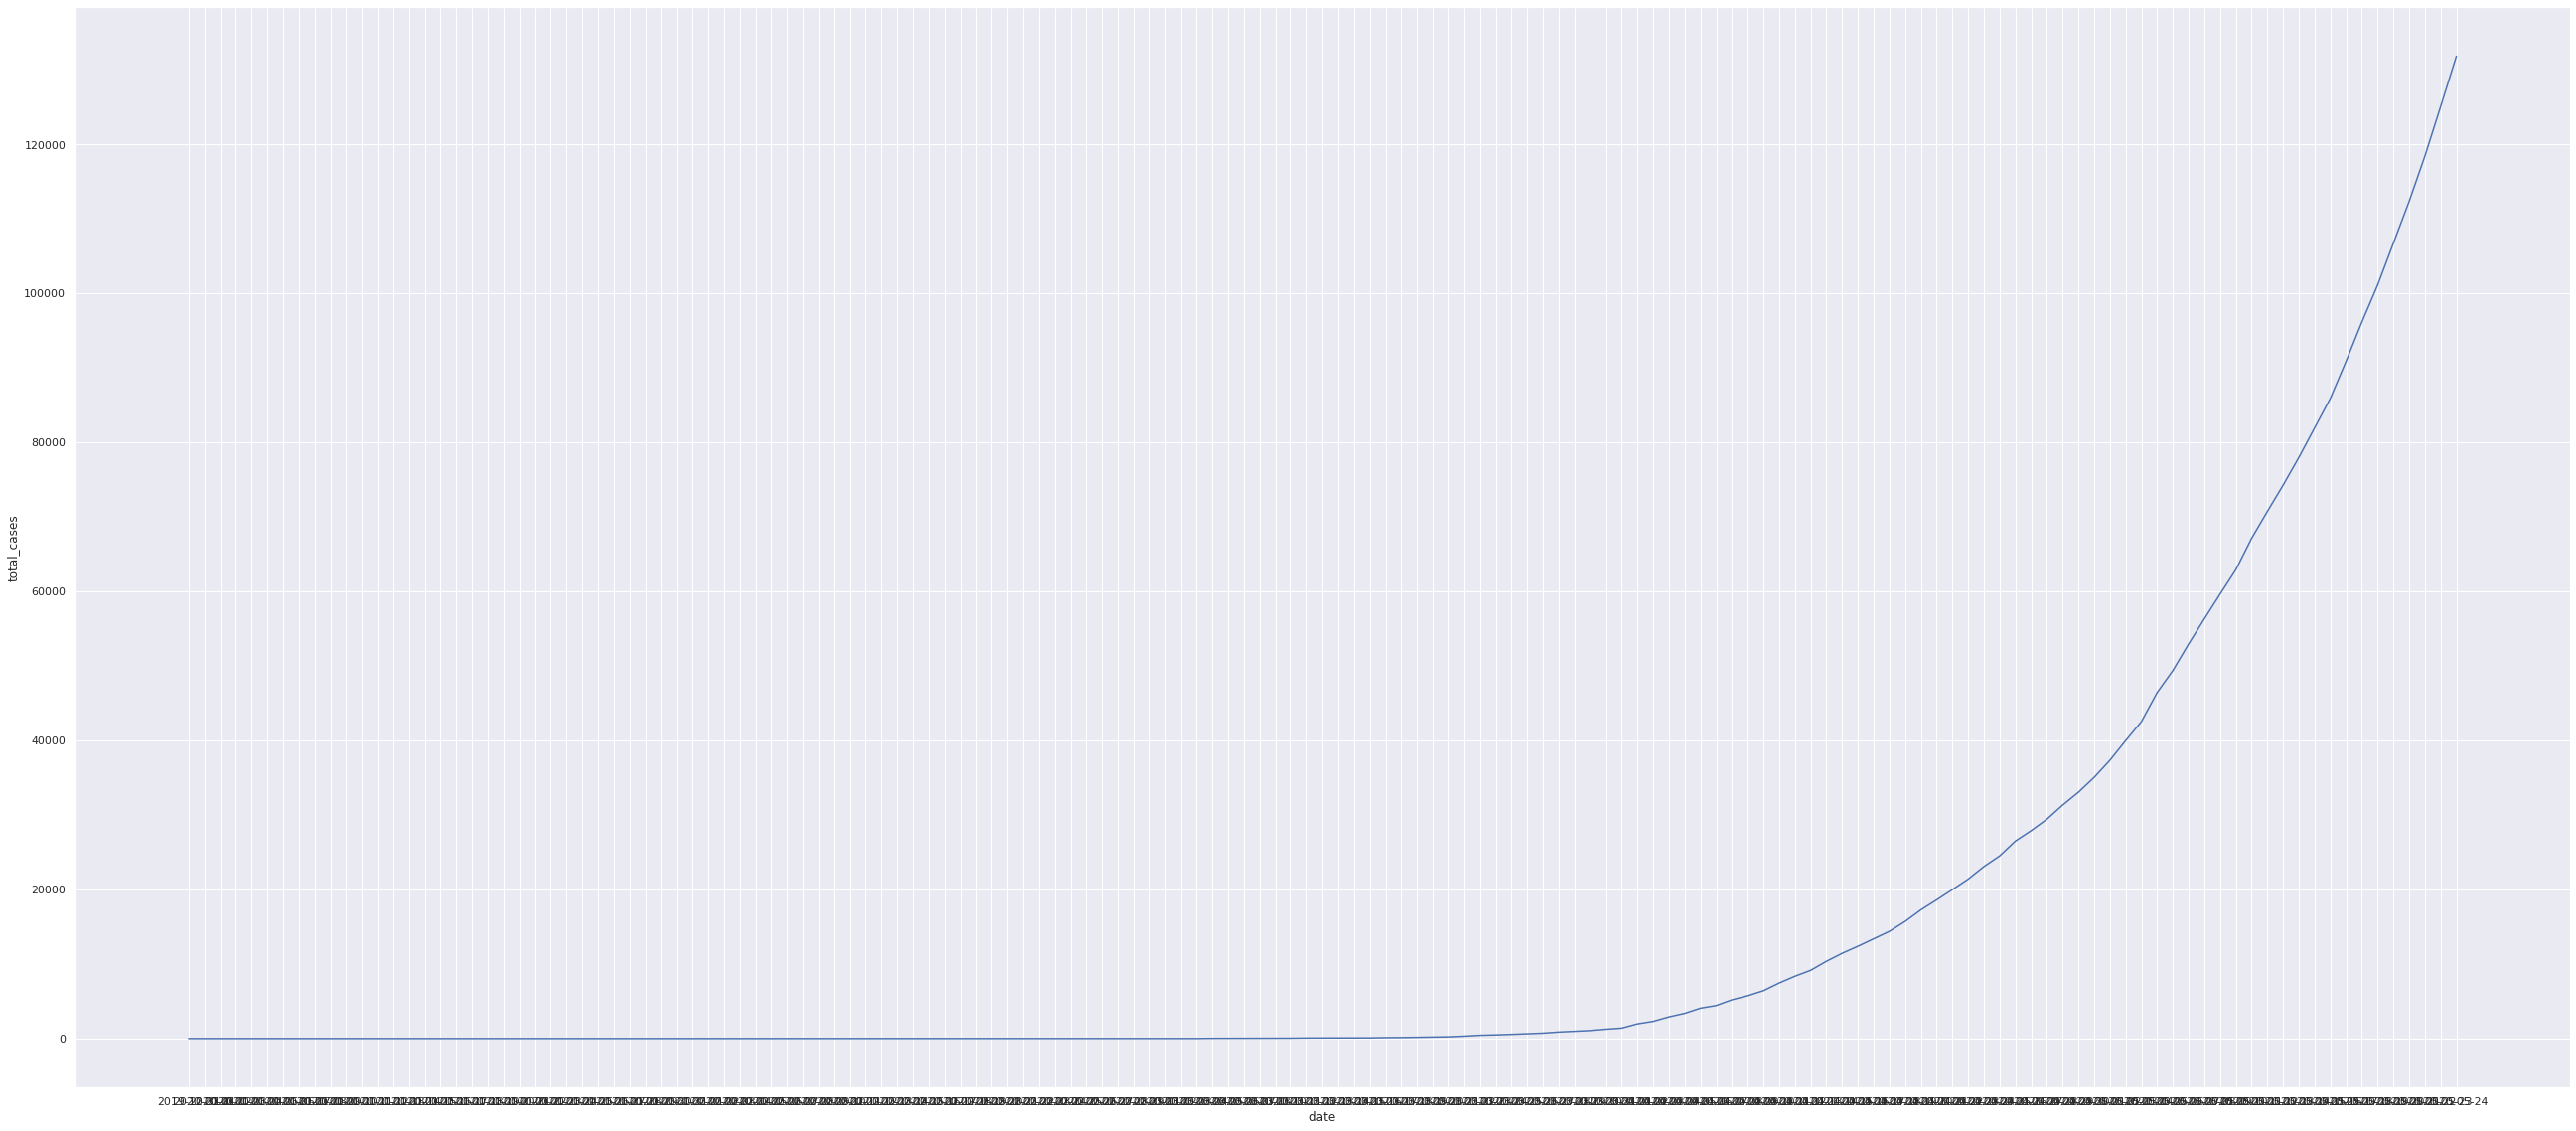

In [ ]:
# Finding Cases per day
sns.set(rc = {'figure.figsize':(45, 20)})
sns.lineplot(x = "date", y = "total_cases", data = india)
plt.show()

Observation: The above graph depicts relation b/w total number of cases on that date

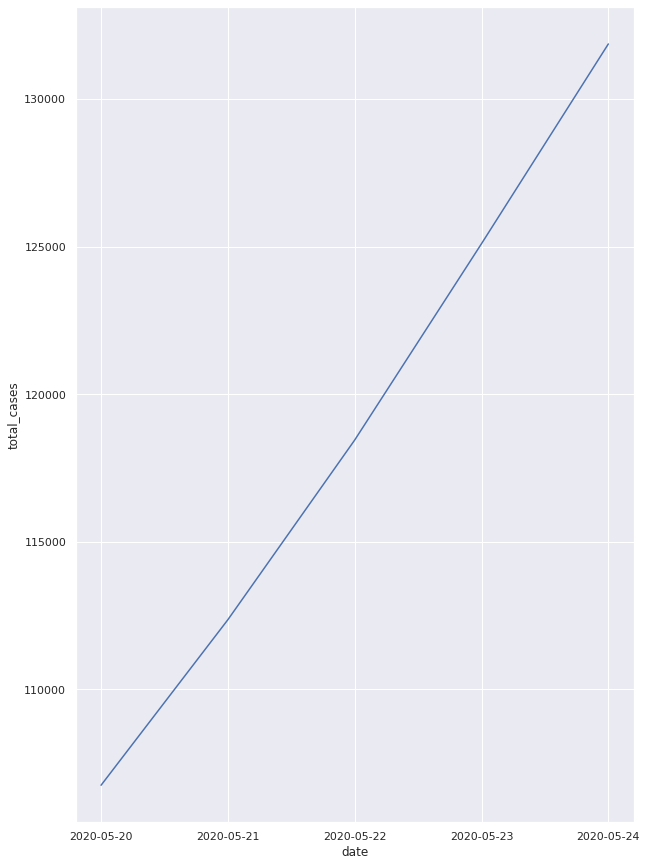

In [ ]:
#Total cases in last 5 days
sns.set(rc = {'figure.figsize': (10, 15)})
sns.lineplot(x = "date", y = "total_cases", data = india.tail())
plt.show()

Observation: The above graph depicts relation b/w total number of cases on that date for last five days

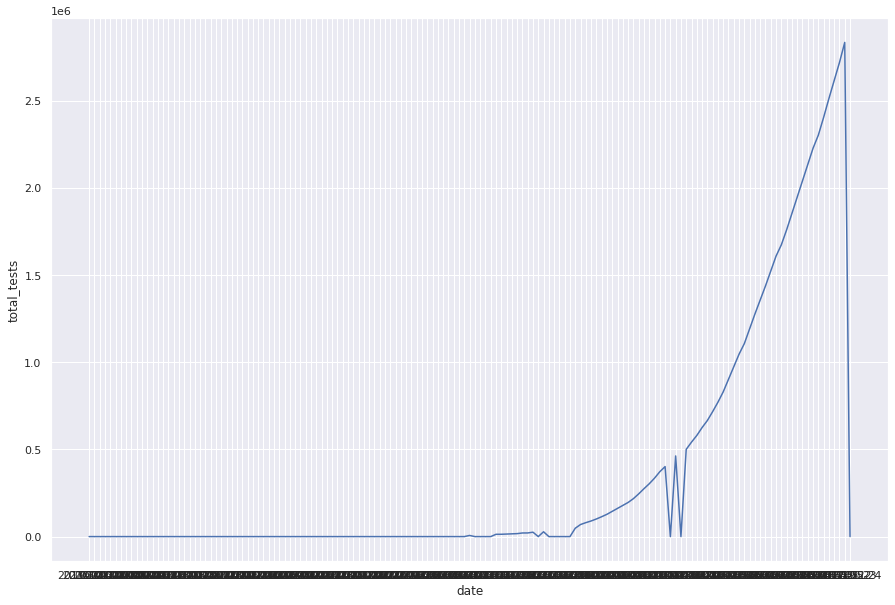

In [ ]:
# Finding tests per day
sns.set(rc = {'figure.figsize':(15, 10)})
sns.lineplot(x = "date", y = "total_tests", data = india)
plt.show()

Observation: The above graph depicts relation b/w total number of tests on that date 

In [ ]:
# Getting latest data
LastDay_cases = covid19[covid19["date"] == "2020-05-24"]
LastDay_cases

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
62,ABW,Aruba,2020-05-24,101,0,3,0,945.994,0.000,28.099,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.067660e+05,584.800,41.2,13.085,7.452,35973.781,0.0,0.000,11.62,0.000,0.000,0.000,0.000
198,AFG,Afghanistan,2020-05-24,9998,782,216,11,256.831,20.088,5.549,0.283,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500
262,AGO,Angola,2020-05-24,60,0,3,0,1.826,0.000,0.091,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,0.0,276.045,3.94,0.000,0.000,26.664,0.000
321,AIA,Anguilla,2020-05-24,3,0,0,0,199.973,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.500200e+04,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000
398,ALB,Albania,2020-05-24,989,8,31,0,343.665,2.780,10.772,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19045,YEM,Yemen,2020-05-24,212,7,39,6,7.108,0.235,1.308,0.201,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700
19153,ZAF,South Africa,2020-05-24,21343,1218,407,10,359.863,20.537,6.862,0.169,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5.930869e+07,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.100,33.200,43.993,2.320
19220,ZMB,Zambia,2020-05-24,920,0,7,0,50.044,0.000,0.381,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000
19285,ZWE,Zimbabwe,2020-05-24,56,0,4,0,3.768,0.000,0.269,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.486293e+07,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700


In [ ]:
# Sorting data based on total_cases on lastday
max_cases = LastDay_cases.sort_values(by = "total_cases", ascending = False)
max_cases

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
19431,OWID_WRL,World,2020-05-24,5273572,97636,341722,3633,676.550,12.526,43.840,0.466,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,3.263,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,0.000,2.770
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,4.540,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,0.000,2.200
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,0.952,8685305.0,282558.0,59.515,1.936,252745.0,1.732,tests performed,0.00,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,0.000,8.050
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,1.968,0.0,0.0,0.000,0.000,0.0,0.000,0,67.06,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,0.000,3.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18723,VGB,British Virgin Islands,2020-05-24,8,0,1,0,264.577,0.000,33.072,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,3.023700e+04,207.973,0.0,0.000,0.000,0.000,0.0,0.000,13.67,0.000,0.000,0.000,0.000
1645,BES,Bonaire Sint Eustatius and Saba,2020-05-24,6,0,0,0,228.824,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,2.622100e+04,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000
5543,ESH,Western Sahara,2020-05-24,6,0,0,0,10.045,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,5.973300e+05,0.000,28.4,0.000,1.380,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000
321,AIA,Anguilla,2020-05-24,3,0,0,0,199.973,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,1.500200e+04,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000


In [ ]:
# Top 5 countries having maximum number cases on last day
max_cases[1:6]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,3.263,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,4.540,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,212559409.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.20
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,0.952,8685305.0,282558.0,59.515,1.936,252745.0,1.732,tests performed,0.00,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,1.968,0.0,0.0,0.000,0.000,0.0,0.000,0,67.06,60461828.0,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,0.0,3.18
4613,DEU,Germany,2020-05-24,178281,431,8247,31,2127.866,5.144,98.432,0.370,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,83783945.0,237.016,46.6,21.453,15.957,45229.245,0.0,156.139,8.31,28.2,33.1,0.0,8.00


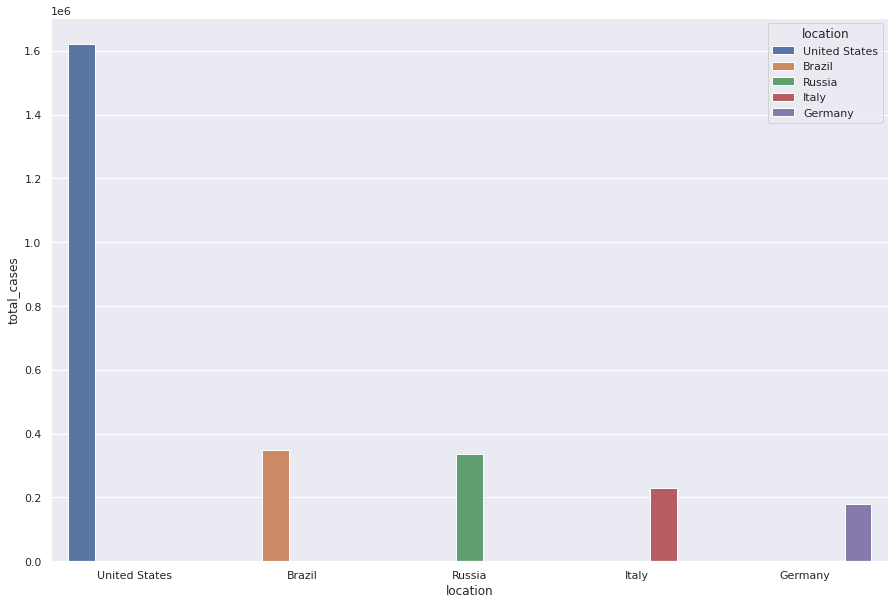

In [ ]:
# Plotting bar graph for countries with maximum number of cases
sns.barplot(x = "location", y = "total_cases", data = max_cases[1:6], hue = "location")
plt.show()

Observation: United States has maximum no of cases whereas germany has least no of cases

### **Feature Engineering**

In [ ]:
# Importing datetime package as dt
# Converting date in 'string' format to 'date' format
import datetime as dt
india['date'] = pd.to_datetime(india['date']) 
india.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [ ]:
# Converting column date to ordinal
india['date']=india['date'].map(dt.datetime.toordinal)
india.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,737424,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,737425,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,737426,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,737427,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,737428,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [ ]:
# Import winsorize function from SciPY module
from scipy.stats.mstats import winsorize

df = pd.read_csv('https://raw.githubusercontent.com/Adiraju-Aditya/COVID_19_DATA_ANALYSIS/main/covid.csv')

df["total_cases"] = winsorize(df["total_cases"], (0.01,0.14))
df["new_cases"] = winsorize(df["new_cases"], (0.01,0.135))
df["total_deaths"] = winsorize(df["total_deaths"], (0.01,0.146))
df["new_deaths"] = winsorize(df["new_deaths"], (0.01,0.14))
df["total_cases_per_million"] = winsorize(df["total_cases_per_million"], (0.01,0.14))
df["new_cases_per_million"] = winsorize(df["new_cases_per_million"], (0.01,0.14))
df["total_deaths_per_million"] = winsorize(df["total_deaths_per_million"], (0.01,0.14))

### **Test, Train split**

In [ ]:
# Spliting data into features and result
x = india['date'].values.reshape(-1,1)
y = india['total_cases'].values

In [ ]:
# Test, Train split (80, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### **Linear Regression Model**

In [ ]:
# Importing Linear regression model
from sklearn.linear_model import LinearRegression

# Creating linear regression model
lr = LinearRegression()

# Importing numpy library as np
import numpy as np

# Training the lr model
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Predicting values of x_test to y_pred
y_pred = lr.predict(x_test)

In [ ]:
# Importing mean squared error function
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(x_test,y_pred)

519750253982.35333

In [ ]:
# Trying to predict using lr model 
lr.predict([[737573]])

#50900.09740007

array([55239.32340598])

### **SVM Model**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mscaler = MinMaxScaler()
india["total_cases"] = mscaler.fit_transform(india["total_cases"].values.reshape(-1,1))
india['total_deaths']=mscaler.fit_transform(india["total_cases"].values.reshape(-1,1))

In [ ]:
# Spliting data into features and result
x = india['total_cases'].values.reshape(-1,1)
y = india['total_deaths'].values.reshape(-1,1)

In [ ]:
# Test, Train split (80, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm_model = SVR(shrinking = True, kernel = 'poly', gamma = 0.01, epsilon = 1, degree = 5, C = 0.1)
svm_model.fit(x_train,y_train)

SVR(C=0.1, degree=5, epsilon=1, gamma=0.01, kernel='poly')

MAE: 0.43393968681325
MSE: 0.20028585767517837
RMSE: 0.4475330799786518


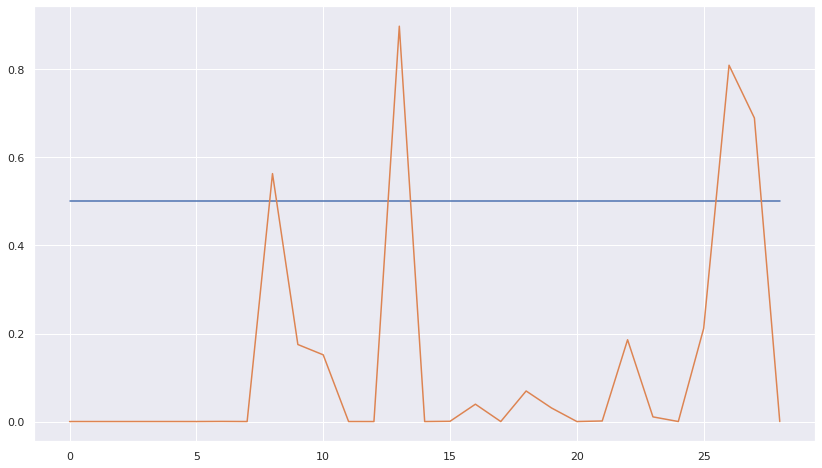

In [ ]:
y_pred = svm_model.predict(x_test)
plt.figure(figsize=(14, 8))
plt.plot(y_pred)
plt.plot(y_test)
print('MAE:', mean_absolute_error(y_pred, y_test))
print('MSE:',mean_squared_error(y_pred, y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_pred, y_test)))

### **HYPOTHESIS TESTING**

**Steps:**




1. Create the hypothesis (Null and Alternate Hypothesis)
2. Appropriate statistical test
3. Let set $\alpha$ as 0.1 i.e Type l error
4. Get data
5. Analyze

$H_{o}:    \mu$=15400

$H_{a}: \mu$ > 15400



value of $z$ at 0.01 we know from $z table$ is $\underline{+}$1.28

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/Adiraju-Aditya/COVID_19_DATA_ANALYSIS/main/covid.csv")

In [ ]:
data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.56,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [ ]:
data['total_cases'].mean()

17526.34155724251

### **Test1 : z-Test**

In [ ]:
data['total_cases'].sample(70)

9023        16
12735        5
395        964
16847     1623
15618      249
         ...  
1915         0
18757       55
2476       598
13911        0
5020     12314
Name: total_cases, Length: 70, dtype: int64

In [ ]:
s=data[70:140]

In [ ]:
sampData=s['total_cases']

In [ ]:
meanSampData=sampData.mean()
hypMean=15400
N=70
standPop=np.std(data['total_cases'])

In [ ]:
alpha=0.1
degrees_of_freedom = N-1

In [ ]:
meanSampData

5.285714285714286

* Mean of sample data > Mean of population data
* So, right tail test

In [ ]:
#right tail use absolute value
import scipy.stats as st
Z_critical=abs(st.norm.ppf(0.10))
Z_critical

1.2815515655446004

In [ ]:
import math
z=(meanSampData-hypMean)/(standPop/math.sqrt(N))
z

-0.7122086788660241

In [ ]:
(-0.08296014274856707) < (-1.2815515655446004)

False

In [ ]:
if (z<Z_critical): #Right-tailed test
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


* as calculated z score 2.27 is greater than 1.28 (tabular z score), we reject the null hypothesis

* if also we would have got -2.27 is greater than -1.28 we would have rejected the Null hypothesis

* Observed value = 2.27

* Critical value = 1.28

## **Test2 : z-Test using P-value**

#### **p-value (observed significance level)**
Another way to reach a statistical conclusion in hypothesis testing problems is by using the p-value

The p-value defines the smallest probability ($\alpha$) for which the null hypothesis can be rejected.

let say $\alpha = .01$

* if $p \underline{<} .01$ strong evidence against the $H_{o}$, hence reject the Null Hypothesis

* if $p > .01$ weak evidence against the $H_{o}$, hence fail to reject the Null Hypothesis

* if near to .01 not sure

**Clculation**

* let say observed z value is 2.27= 0.98840

* The p-value would be 1-0.98840 = 0.0116



* but we  reject the $H_{o}$ at $\alpha=.1$

* as 0.0116 < 0.1

In [ ]:
z=(meanSampData-hypMean)/(standPop/math.sqrt(N))
z

-0.7122086788660241

In [ ]:
# right tail use "1-" for getting value to the right
p_val=(1-st.norm.cdf(z))
p_val

0.7618322182755801

In [ ]:
if (p_val>alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


## **Test3 : t-Test**

In [ ]:
t=(meanSampData-hypMean)/(standPop/math.sqrt(N))
t

-0.7122086788660241

In [ ]:
t_critical = abs(st.t.ppf(alpha/2,degrees_of_freedom))
t_critical

1.667238548542593

In [ ]:
if (t>t_critical): 
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


In [ ]:
st.ttest_1samp(sampData,17000)

Ttest_1sampResult(statistic=-10936.934080393017, pvalue=5.462999083551675e-217)

In [ ]:
0.05<0.1 #We reject the null hypothesis

True

In [ ]:
st.ttest_1samp(sampData,150)

Ttest_1sampResult(statistic=-93.1307568188271, pvalue=2.733732039560682e-74)

In [ ]:
2.53<0.1  #We fail to reject the null hypothesis

False

## **Test4 : t-Test using P-value**

In [ ]:
t=(meanSampData-hypMean)/(standPop/math.sqrt(N))
t

-0.7122086788660241

In [ ]:
p_val=(1-st.t.cdf(abs(t),degrees_of_freedom))
p_val

0.23936845833327958

In [ ]:
if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


SO OUR DATA HAS MORE THAN ONE COLUMN SO ANOVA IS BEST BEFORE PERFORMING ANOVA WE HAVE TO PERFORM LEVENES TEST

In [ ]:
df1=india.iloc[:,3:]
df1.drop("tests_units",axis=1,inplace=True)
df1

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,0.809522,5611,0.809522,140,77.355,4.066,2.393,0.101,2512388.0,108121.0,1.821,0.078,94020.0,0.068,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8520,0.852057,5609,0.852057,132,81.419,4.064,2.489,0.096,2615920.0,103532.0,1.896,0.075,95554.0,0.069,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8521,0.898224,6088,0.898224,148,85.831,4.412,2.596,0.107,2719434.0,103514.0,1.971,0.075,97069.0,0.070,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8522,0.948684,6654,0.948684,137,90.653,4.822,2.696,0.099,2834798.0,115364.0,2.054,0.084,100074.0,0.073,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [ ]:
df1.replace(np.nan, 0)

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,0.809522,5611,0.809522,140,77.355,4.066,2.393,0.101,2512388.0,108121.0,1.821,0.078,94020.0,0.068,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8520,0.852057,5609,0.852057,132,81.419,4.064,2.489,0.096,2615920.0,103532.0,1.896,0.075,95554.0,0.069,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8521,0.898224,6088,0.898224,148,85.831,4.412,2.596,0.107,2719434.0,103514.0,1.971,0.075,97069.0,0.070,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8522,0.948684,6654,0.948684,137,90.653,4.822,2.696,0.099,2834798.0,115364.0,2.054,0.084,100074.0,0.073,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [ ]:
from scipy import stats 
a=india["total_cases"]
b=india["new_cases"]
c=india["total_deaths"]
d=india["new_deaths"]
e=india["total_cases_per_million"]
f=india["new_cases_per_million"]
g=india["total_deaths_per_million"]
h=india["new_deaths_per_million"]
stats.levene(a,b,c,d,e,f,g)

LeveneResult(statistic=46.312939334890224, pvalue=3.0863612807587904e-50)

pvalue<0.01 so reject null hypothesis Reject Null Hypothesis i.e. Atleast one population mean is different Thus there is variance in more than 2 samples.

In [ ]:
from scipy import stats 
chi2, p, dof, ex = stats.chi2_contingency(df1, correction=False)
print("chi2 :",chi2)
formatted_float = "{:.4f}".format(p)
print("P_value: ",formatted_float)
print("degree of freedom:",dof)
print('\n')
print("ex :",ex)

chi2 : 213339540.3870433
P_value:  0.0000
degree of freedom: 3888


ex : [[1.17421191e-01 9.09179433e+02 1.17421191e-01 ... 2.05942228e+01
  5.95332993e+01 5.29851362e-01]
 [1.17421191e-01 9.09179433e+02 1.17421191e-01 ... 2.05942228e+01
  5.95332993e+01 5.29851362e-01]
 [1.17421191e-01 9.09179433e+02 1.17421191e-01 ... 2.05942228e+01
  5.95332993e+01 5.29851362e-01]
 ...
 [1.17670193e-01 9.11107422e+02 1.17670193e-01 ... 2.06378945e+01
  5.96595445e+01 5.30974955e-01]
 [1.17681320e-01 9.11193582e+02 1.17681320e-01 ... 2.06398461e+01
  5.96651863e+01 5.31025167e-01]
 [1.17421795e-01 9.09184108e+02 1.17421795e-01 ... 2.05943287e+01
  5.95336054e+01 5.29854087e-01]]


p-value<0.01 so reject null hypothesis

### **FEATURE SELECTION**

In [ ]:
frame = pd.read_csv("https://raw.githubusercontent.com/Adiraju-Aditya/COVID_19_DATA_ANALYSIS/main/covid.csv")
frame

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.56,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19491,NaN,International,2020-02-28,705,0,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19492,NaN,International,2020-02-29,705,0,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19493,NaN,International,2020-03-01,705,0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19494,NaN,International,2020-03-02,705,0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
frame.fillna(0, inplace = True)

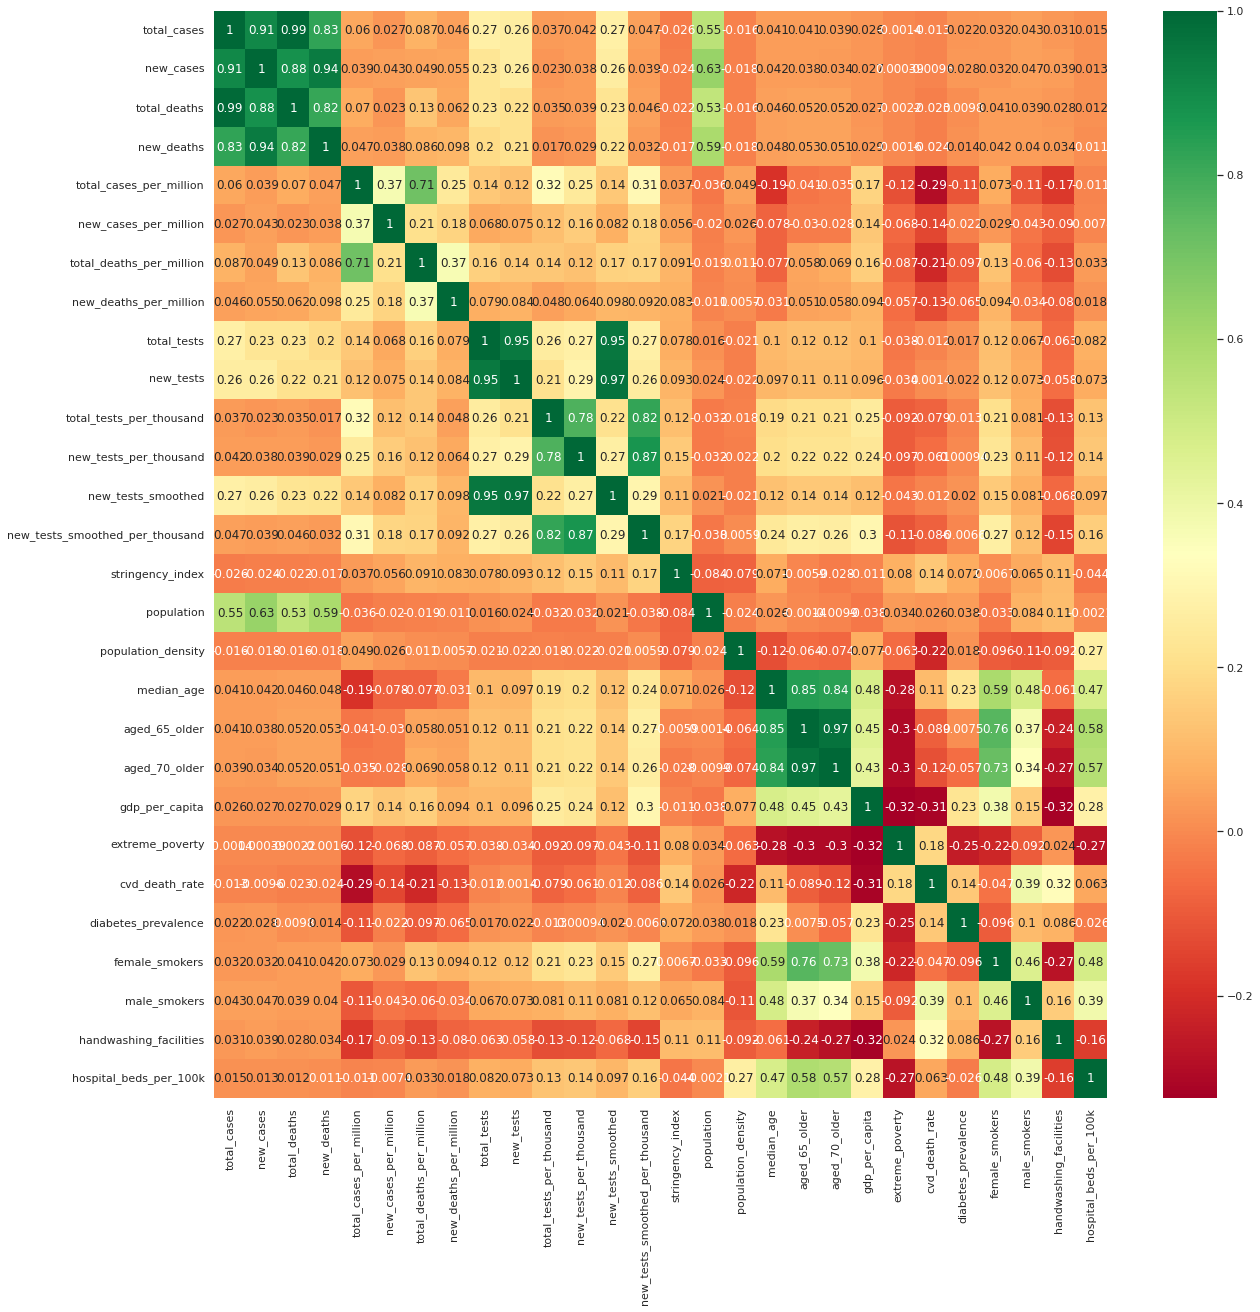

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = frame.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
#plot heat map
g=sns.heatmap(frame[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [ ]:
frame1 = frame.iloc[:,:14]
frame1

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,0.0,0.0,0.0
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,0.0,0.0,0.0
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,0.0,0.0,0.0
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,0.0,0.0,0.0
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19491,0,International,2020-02-28,705,0,4,0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
19492,0,International,2020-02-29,705,0,6,2,0.000,0.000,0.0,0.0,0.0,0.0,0.0
19493,0,International,2020-03-01,705,0,6,0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
19494,0,International,2020-03-02,705,0,6,0,0.000,0.000,0.0,0.0,0.0,0.0,0.0


In [ ]:
a = pd.get_dummies(frame1.iso_code)
b = pd.get_dummies(frame1.location)

In [ ]:
frame1 = pd.concat([frame1,a,b],axis=1)

In [ ]:
frame1

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,0,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATG,AUS,AUT,AZE,BDI,BEL,BEN,BES,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BLZ,...,Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,World,Yemen,Zambia,Zimbabwe
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19491,0,International,2020-02-28,705,0,4,0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19492,0,International,2020-02-29,705,0,6,2,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19493,0,International,2020-03-01,705,0,6,0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19494,0,International,2020-03-02,705,0,6,0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
frame1.drop(["iso_code","location","date"],axis=1,inplace=True)

In [ ]:
X = frame1.drop("total_deaths", axis=1)

In [ ]:
y = frame1['total_deaths']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13647, 434), (13647,), (5849, 434), (5849,))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline
univariate = f_classif(X_train, y_train)
univariate

(array([2.95667024e+04, 3.24957522e+03, 6.63320538e+03, 3.46758367e+00,
        5.24398566e-01, 1.09628437e+01, 1.99849490e+00, 2.41911234e+02,
        1.30744698e+02, 3.48120172e+00, 2.84270860e-02, 1.46754352e-01,
        3.46986597e-01, 4.43042077e-01, 3.36514087e-02, 1.65572419e+00,
        9.33588929e-01, 5.91770578e-01, 2.23403243e+00, 1.65069157e-01,
        2.41580364e-01, 5.00091381e-01, 3.56878963e+00, 9.00909093e-02,
        2.09234974e-01, 5.64662087e+00, 1.13883813e-01, 3.19992597e-02,
        6.62690013e-01, 1.66040967e+00, 5.59622191e-01, 1.11790017e-01,
        1.12563032e+00, 6.17733246e-01, 3.55780330e-01, 4.44017042e-01,
        1.25174121e-01, 7.36326029e-01, 3.86759831e+00, 4.31030390e-01,
        2.22861814e-01, 4.35873713e-02, 3.07348991e-01, 3.83407527e-02,
        3.50796712e+00, 4.06871237e+00, 2.03333298e+00, 2.42333229e+01,
        2.11017305e-01, 9.85811310e-01, 5.25355999e-01, 2.25318673e-01,
        2.45954794e+00, 9.59637811e-02, 1.81664542e-01, 2.633271

In [ ]:
# Capture P values in a series
import pandas as pd
import numpy as np
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

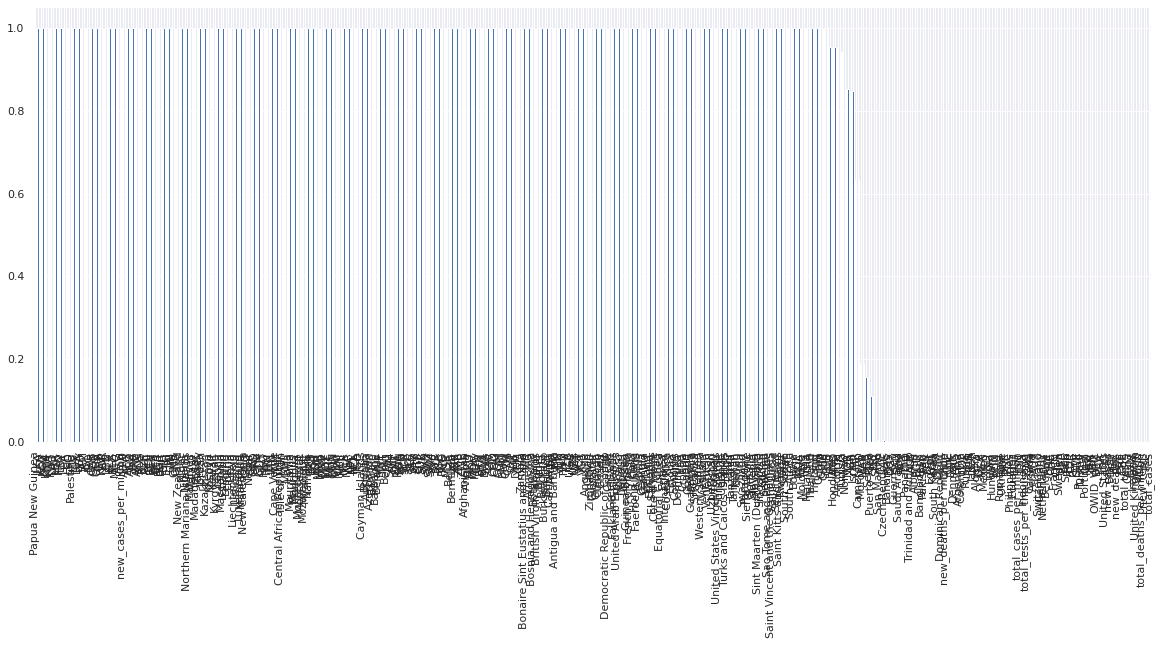

In [ ]:
# Plot the P values
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [ ]:
# Select K percentile Features
k_percentile_features = SelectPercentile(f_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[k_percentile_features.get_support()]

Index(['total_cases', 'new_cases', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'BEL', 'BHR', 'CHN', 'ESP', 'FRA', 'GBR',
       'HRV', 'IRN', 'ISL', 'ITA', 'LTU', 'NPL', 'OWID_WRL', 'SMR', 'TWN',
       'USA', 'VNM', 'Bahrain', 'Belgium', 'China', 'Croatia', 'France',
       'Iceland', 'Iran', 'Italy', 'Lithuania', 'Nepal', 'San Marino', 'Spain',
       'Taiwan', 'United Kingdom', 'United States', 'Vietnam', 'World'],
      dtype='object')

### **Test, Train split**

In [ ]:
X_train = k_percentile_features.transform(X_train)
X_train.shape

(13647, 44)

In [ ]:
X_test = k_percentile_features.transform(X_test)
X_test.shape

(5849, 44)

### **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression(normalize=True)
model.fit(X_train,y_train)
ypred1 = model.predict(X_test)
print(ypred1)

[-103.63880426 5371.03584646  -41.158192   ... -300.53468763 1414.69195341
  -41.46507255]


In [ ]:
r2_score = model.score(X_test,y_test)
print(r2_score*100,'%')

99.27465187981016 %


###TIME SERIES

In [ ]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib


In [ ]:
frame2 = frame.iloc[:,2:4]
frame2

,date,total_cases
0,2020-03-13,2
1,2020-03-20,4
2,2020-03-24,12
3,2020-03-25,17
4,2020-03-26,19
...,...,...
19491,2020-02-28,705
19492,2020-02-29,705
19493,2020-03-01,705
19494,2020-03-02,705


In [ ]:
frame2['date'] = pd.to_datetime(frame2['date'])

In [ ]:
# Sort the Order Date 
frame2 = frame2.sort_values('date')
#print the sorted values
print(frame2.head(1))
#check any missing values
frame2.isnull().sum()

            date  total_cases
14482 2019-12-31            0


date           0
total_cases    0
dtype: int64

In [ ]:
#set 'Order Date' as index
frame2 = frame2.set_index('date')
frame2.index

DatetimeIndex(['2019-12-31', '2019-12-31', '2019-12-31', '2019-12-31',
               '2019-12-31', '2019-12-31', '2019-12-31', '2019-12-31',
               '2019-12-31', '2019-12-31',
               ...
               '2020-05-24', '2020-05-24', '2020-05-24', '2020-05-24',
               '2020-05-24', '2020-05-24', '2020-05-24', '2020-05-24',
               '2020-05-24', '2020-05-24'],
              dtype='datetime64[ns]', name='date', length=19496, freq=None)

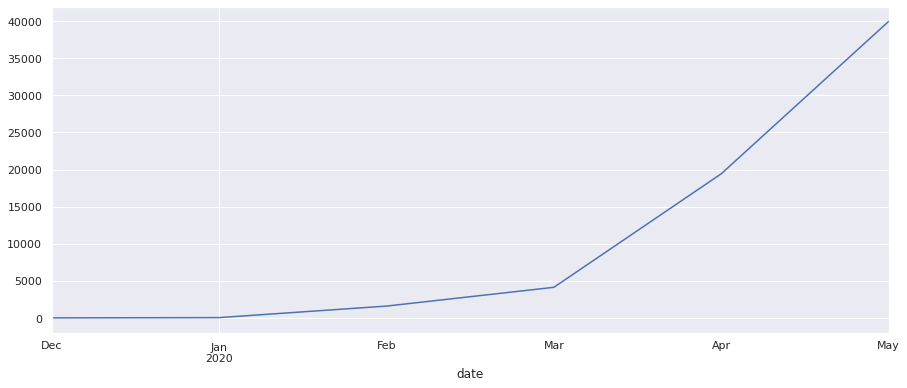

In [ ]:
y = frame2['total_cases'].resample('MS').mean()
y.plot(figsize = (15, 6))
plt.show()

In [ ]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:136.76041532934565
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:135.37067527843058
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:109.7228820150259
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:111.91597639908179
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:134.63655178820952
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:136.3660190529372
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:105.58782038224192
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:128.56397557089542


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (0, 0, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0  3.07e-108          0      1.000  -6.03e-108   6.03e-108
ma.L1               0  3.08e-108          0      1.000  -6.03e-108   6.03e-108
sigma2          1e-10         -0       -inf      0.000       1e-10       1e-10


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
prediction = result.get_prediction(start = pd.to_datetime('2021-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower total_cases,upper total_cases
2021-01-01,40959.999948,40960.000052
